<a href="https://colab.research.google.com/github/YShukla2024/DataAnalysis_Task/blob/main/DAY-5/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Rainfall.csv')

In [4]:
df.shape

(366, 12)

In [6]:
df.head(3)#here we see the top 3 values of thr data set

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2


In [7]:
df.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


There is 1 missing values in the windspeed and winddirection

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [12]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

Here we can observe that there are unnecessary spaces in the names of the columns let’s remove that.

In [14]:
df.rename(str.strip,axis='columns',inplace=True)

In [15]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


null value imputation.

In [24]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mean)

In [27]:
df['windspeed'] = df['windspeed'].fillna(df['windspeed'])

## EDA

(EDA) is crucial for understanding your data, identifying patterns, and generating insights that can inform further analysis or decision-making. Data is the lifeblood of cutting-edge groups, and the capability to extract insights from records has become a crucial talent in today's statistics-pushed world. Exploratory Data Analysis (EDA) is a powerful method that allows analysts, scientists, and researchers to gain complete knowledge of their data earlier than projecting formal modeling or speculation testing.

$$Univariate Analysis$$

<Axes: xlabel='rainfall', ylabel='Count'>

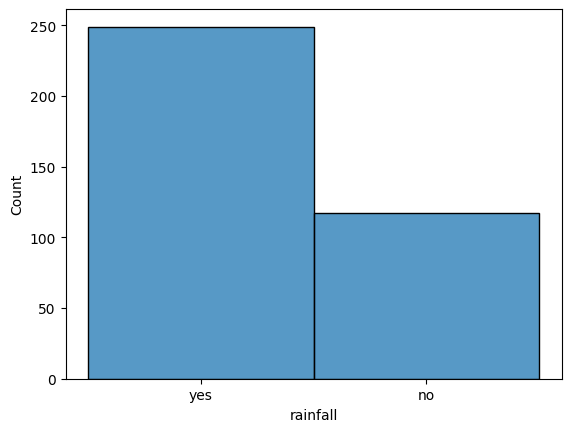

In [41]:
sns.histplot(df['rainfall'])

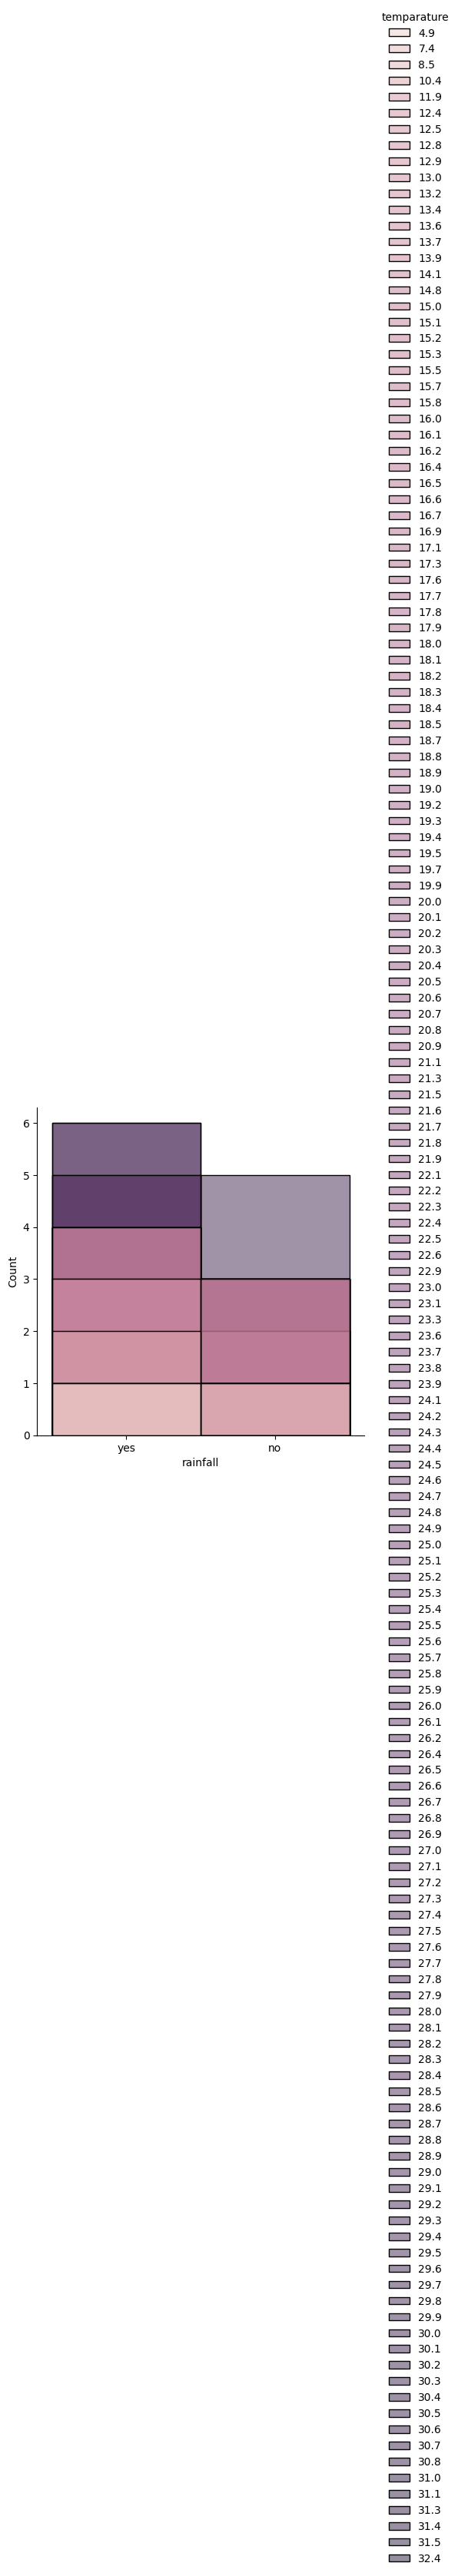

In [56]:
sns.displot(data=df,x='rainfall',hue='temparature')

In [47]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

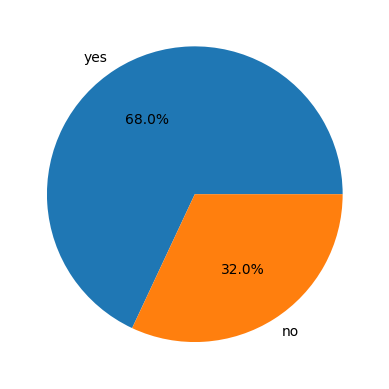

In [54]:
import matplotlib.pyplot as plt

plt.pie(df['rainfall'].value_counts().values,
        labels=df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

<Axes: ylabel='humidity'>

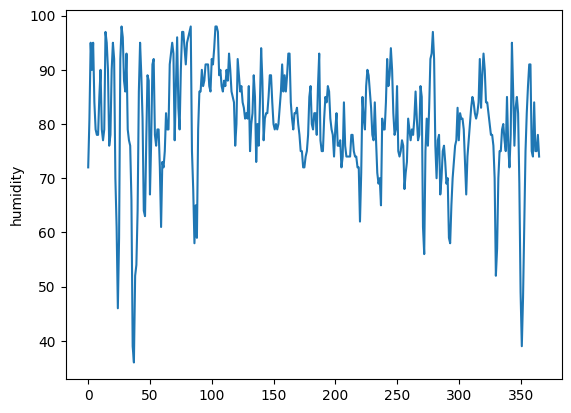

In [60]:
sns.lineplot(df['humidity'])

$$Bivariate Analysis$$

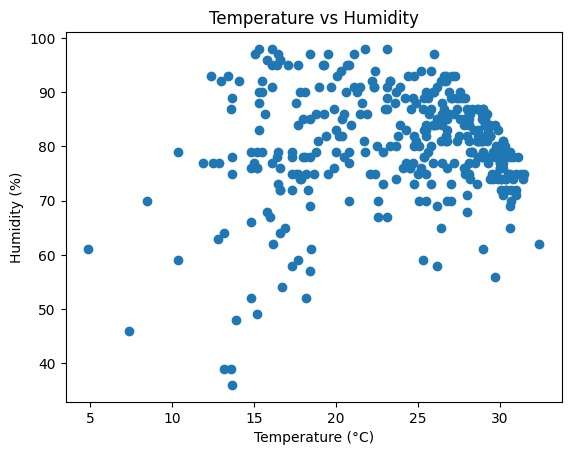

In [63]:
import matplotlib.pyplot as plt

plt.scatter(df['temparature'], df['humidity'])  # Note the spelling: 'temparature'
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity')
plt.show()

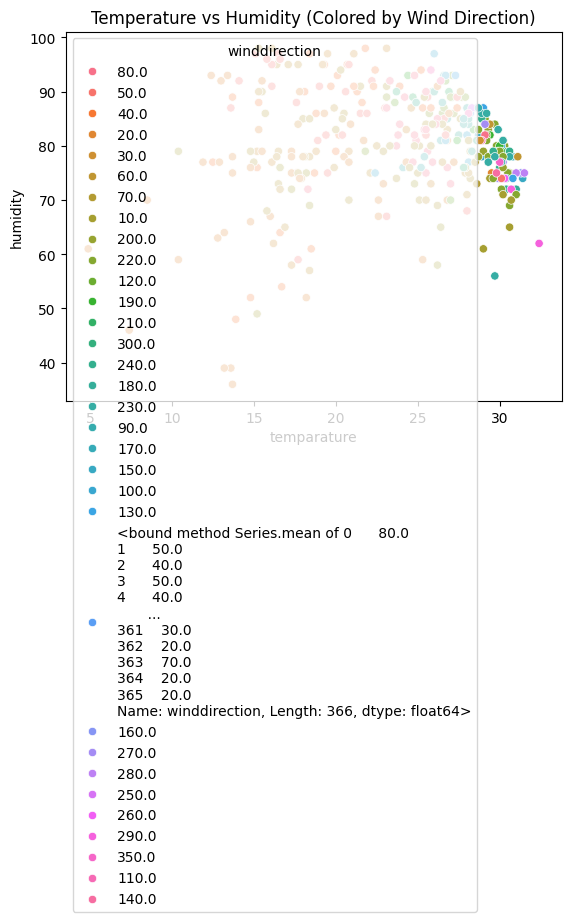

In [65]:
sns.scatterplot(data=df, x='temparature', y='humidity', hue='winddirection')
plt.title('Temperature vs Humidity (Colored by Wind Direction)')
plt.show()

$$multivariate Analysis$$

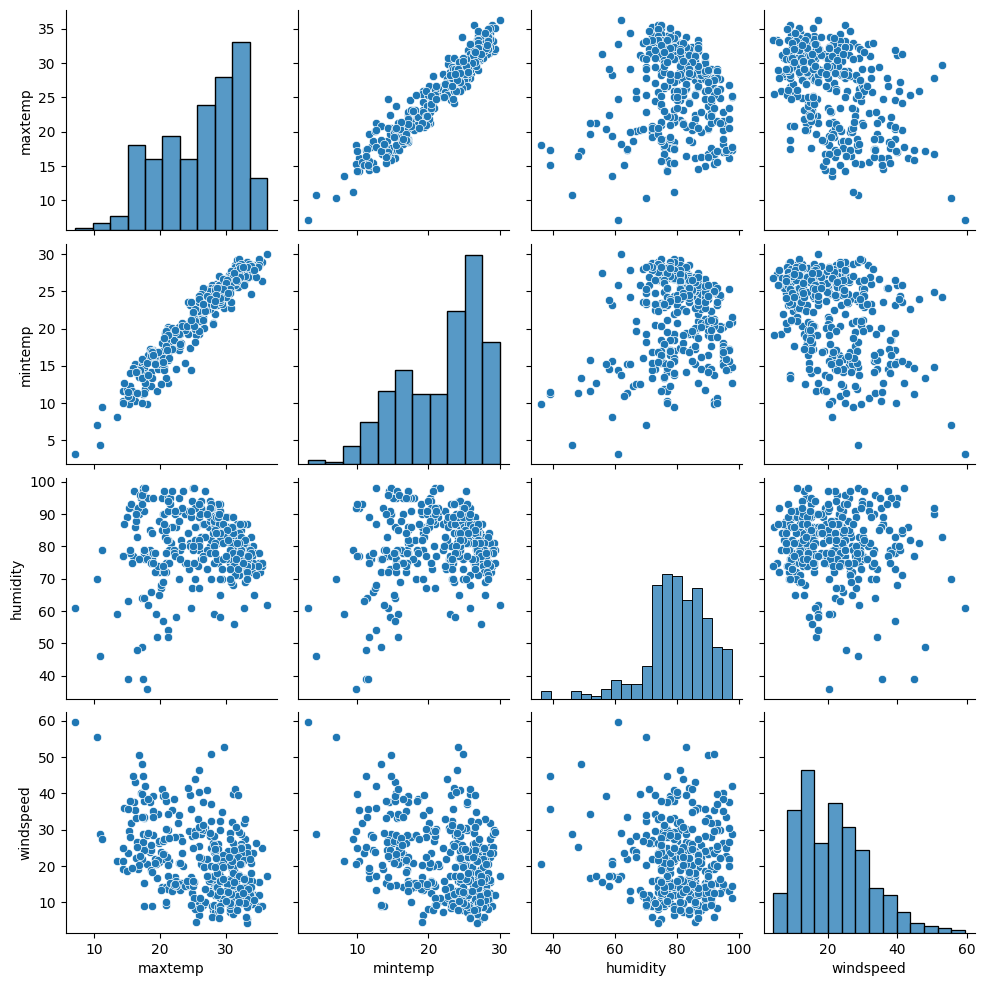

In [64]:
numerical_cols = ['maxtemp', 'mintemp', 'humidity', 'rainfall', 'windspeed']
sns.pairplot(df[numerical_cols])
plt.show()

In [72]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine', 'windspeed']


boxplots for the continuous variable to detect the outliers present in the data.

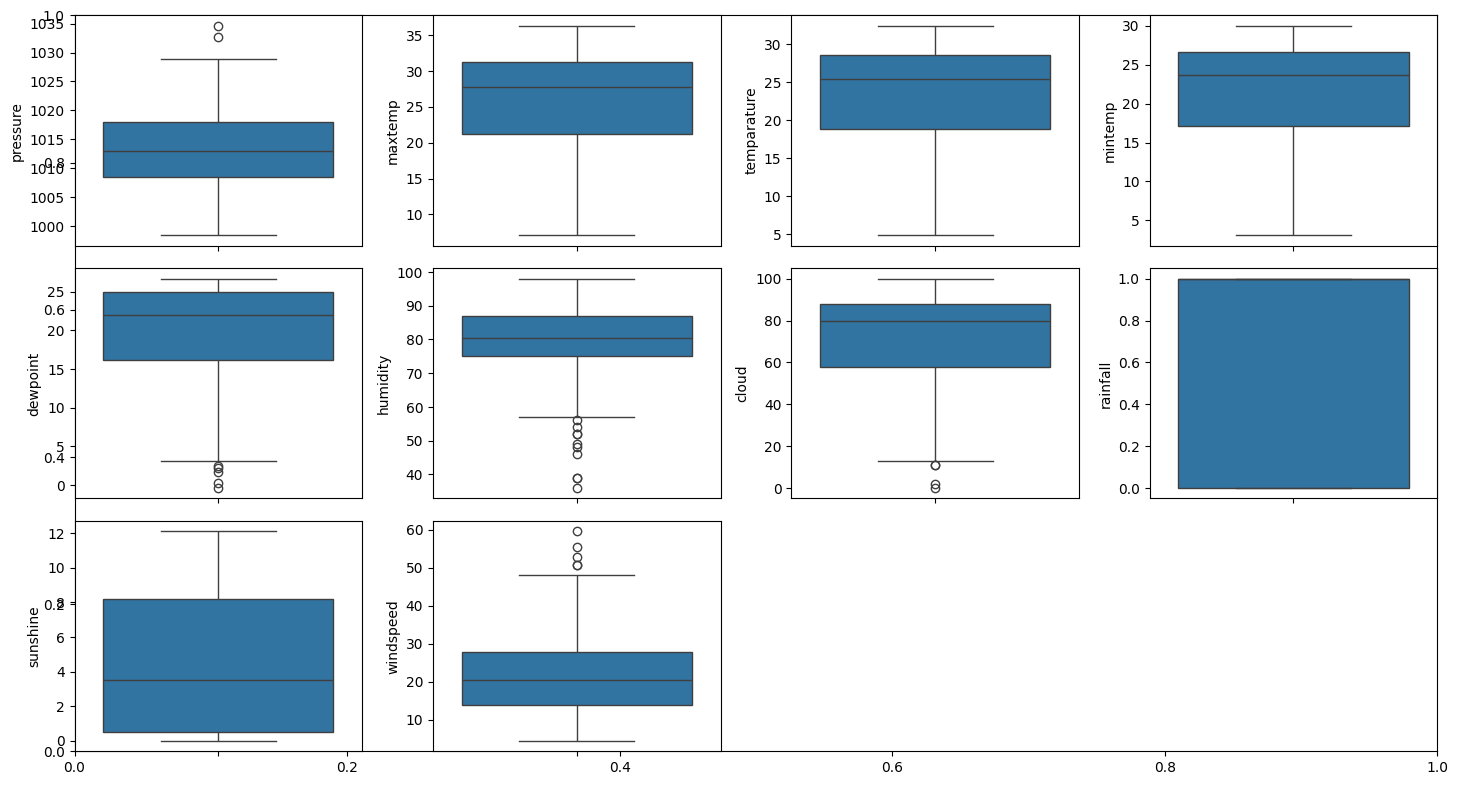

In [74]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

<ipython-input-75-c32f7eccf016>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-75-c32f7eccf016>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-75-c32f7eccf016>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

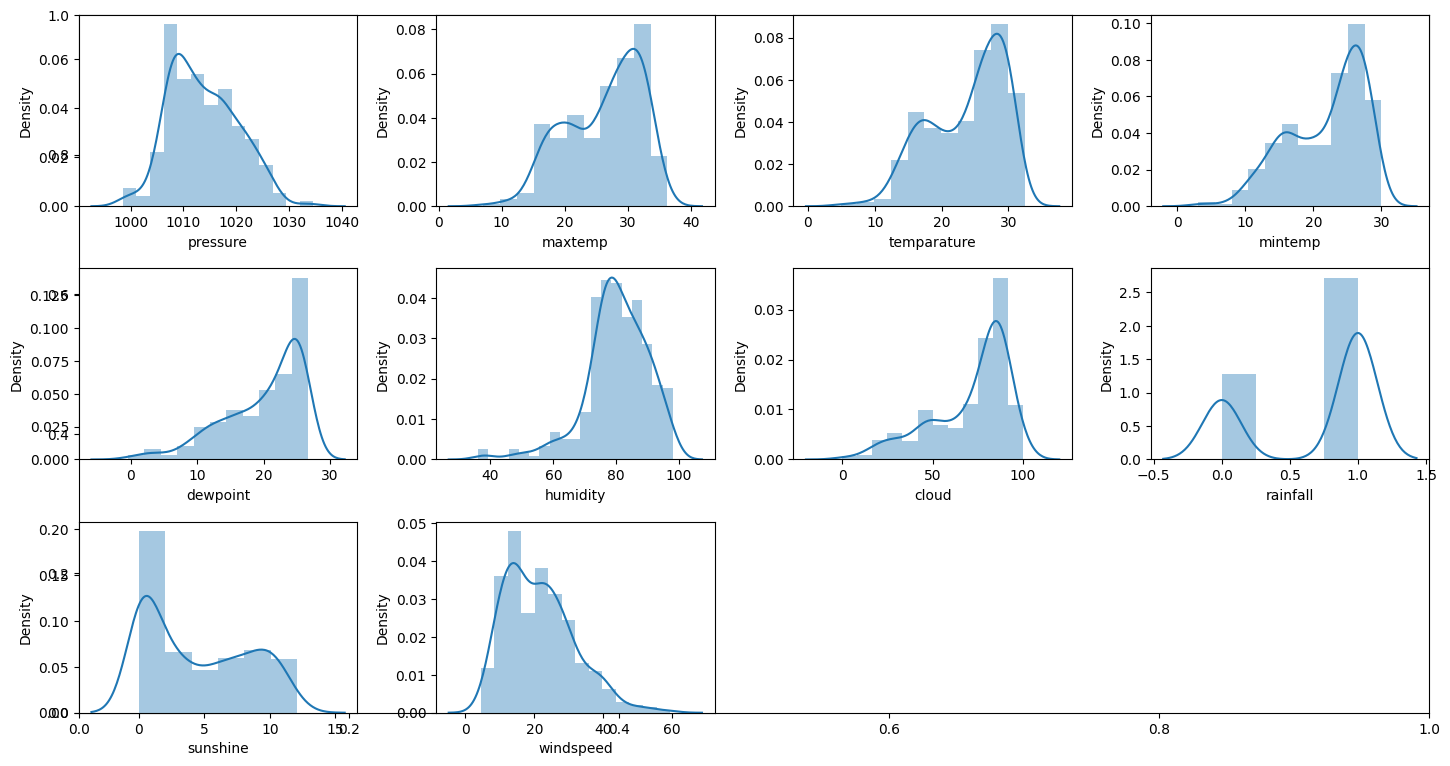

In [75]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()
